# Word2Vec

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. Hence, each dimension in that vector space codifies semantic and syntactic information about the word.  

![](./images/wv.png)

You can use Word2Vect by installing the `gensim` library in Python.

In [ ]:
!pip install gensim

Let's begin

### Load Corpus

Let's load a bunch of textual data I scraped from the web domain of Princeton University (https://www.princeton.edu). You can check this input file `princeton.csv` yourself to see how the input data looks.

In [1]:
import gensim
from gensim.models.word2vec import Word2Vec
import os

inputPath = os.path.normpath(r'.') 
fileName = 'princeton.csv'                             
inputFilePath = os.path.join(inputPath, fileName)                

## Preprocessing the corpus

We need to preprocess the textual data in our Corpus. Preprocessing is about transforming all words to lowercase, Removing HTML tags, removing nonalphanumeric characters, removing punctuation and multiple white spaces and also removing, stop words that are very frequent  in the English language but which do not add a lot of value to a model (words such as: and, or, if, etc.).

The function `preprocessing` below takes care of all of this and returns a list of sentences that will be the input for the word2vec algorithm.

In [2]:
from gensim.parsing.preprocessing import * #provides a number of convenience preprocessing functions optimized for speed
import csv

def preprocessing(file):
    
    CUSTOM_FILTERS = [lambda x: x.lower(), #To lowercase
                      lambda text: re.sub(r'https?:\/\/.*\s', '', text, flags=re.MULTILINE), #To Strip away URLs
                      strip_tags, #Remove tags from s using RE_TAGS.
                      strip_non_alphanum,#Remove non-alphabetic characters from s using RE_NONALPHA.
                      strip_punctuation, #Replace punctuation characters with spaces in s using RE_PUNCT.
                      strip_numeric, #Remove digits from s using RE_NUMERIC.
                      strip_multiple_whitespaces,#Remove repeating whitespace characters (spaces, tabs, line breaks) from s and turns tabs & line breaks into spaces using RE_WHITESPACE.
                      remove_stopwords, # Set of 339 stopwords from Stone, Denis, Kwantes (2010).
                      lambda x: strip_short(x, minsize=3), #Remove words with length lesser than minsize from s.
                     ]

    csv.field_size_limit(2147483647)
    with open(file,'r', newline='',encoding="utf-8") as inpFile:

        csvObject = csv.reader(inpFile, delimiter=',',quotechar='"')

        wordThreshold=5 #Important: filter out sentences with less than wordThreshold words

        sentences = []
        for csvEntry in csvObject:
            if len(csvEntry)>1:
                lines = csvEntry[1].split('\n') #csvEntry[0] is url csvEntry[1] is text Fetched from URL

                for line in lines: #Different elements appear in their own line
                    words = preprocess_string(line,CUSTOM_FILTERS)

                    if len(words)>wordThreshold: #Important: filter out sentences with less than wordThreshold words
                        sentences.append(words)
    wordsInCorpus=0
    for i, s in enumerate(sentences):
        wordsInCorpus += len(s)
    print("Number of words in corpus:",wordsInCorpus)
    print("Number of sentences in corpus:",len(sentences))
    return sentences

sentences = preprocessing(inputFilePath)

Number of words in corpus: 3614743
Number of sentences in corpus: 178390


Let's check the first 5 sentences in our corpus. Notice that common Stop words have been removed, so the sentences read a bit weird.

In [3]:
for s in sentences[0:4]:
    print(s)

['health', 'professions', 'advising', 'shows', 'students', 'way', 'medicine']
['health', 'professions', 'advising', 'helps', 'students', 'alumni', 'consider', 'medical', 'health', 'care', 'career']
['united', 'states', 'sen', 'cory', 'booker', 'new', 'jersey', 'selected', 'deliver', 'keynote', 'address', 'university', 'class', 'day', 'ceremony', 'monday', 'june']
['daylong', 'conference', 'princeton', 'defending', 'democracy', 'civilian', 'military', 'responses', 'weaponized', 'information', 'brought', 'leaders', 'military', 'government', 'academic', 'backgrounds', 'discuss', 'information', 'warfare', 'protect', 'corrosive', 'effects', 'democracy']


## Word2Vec model

We are ready to train our work2vec model. Here we instanciate our Word2Vect model with the CBOW architecture, using a window size of context words of size 15, using word vectors of 100 dimensions and only calculating word vectors for words that appear at least 5 times in the corpus of data.  We also use 4 computational threads to speed up the computation. Finally, the network iterates 5 times through the corpus (5 epochs).

In [5]:
model = Word2Vec(sentences, # The sentences iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network
                 sg=0, #Defines the training algorithm. If 1, skip-gram is employed; otherwise, CBOW is used
                 size=100,#Dimensionality of the feature vectors
                 window=15,# The maximum distance between the current and predicted word within a sentence
                 min_count=5, #Ignores all words with total frequency lower than this
                 workers=4, #Use these many worker threads to train the model (=faster training with multicore machines).
                 iter = 5, # (int) – Number of iterations (epochs) over the corpus. //5
                )

The vocabulary of learned word vectors:

In [6]:
model.wv.vocab

{'health': <gensim.models.keyedvectors.Vocab at 0x1f635277e48>,
 'professions': <gensim.models.keyedvectors.Vocab at 0x1f635297048>,
 'advising': <gensim.models.keyedvectors.Vocab at 0x1f673c8f9b0>,
 'shows': <gensim.models.keyedvectors.Vocab at 0x1f673c8ff98>,
 'students': <gensim.models.keyedvectors.Vocab at 0x1f605315a90>,
 'way': <gensim.models.keyedvectors.Vocab at 0x1f605315c88>,
 'medicine': <gensim.models.keyedvectors.Vocab at 0x1f605315d30>,
 'helps': <gensim.models.keyedvectors.Vocab at 0x1f605315d68>,
 'alumni': <gensim.models.keyedvectors.Vocab at 0x1f605315da0>,
 'consider': <gensim.models.keyedvectors.Vocab at 0x1f605315dd8>,
 'medical': <gensim.models.keyedvectors.Vocab at 0x1f605315e10>,
 'care': <gensim.models.keyedvectors.Vocab at 0x1f605315e48>,
 'career': <gensim.models.keyedvectors.Vocab at 0x1f605315e80>,
 'united': <gensim.models.keyedvectors.Vocab at 0x1f605315eb8>,
 'states': <gensim.models.keyedvectors.Vocab at 0x1f605315ef0>,
 'sen': <gensim.models.keyedvecto

The length of our vocabulary:

In [7]:
len(model.wv.vocab)

28305

So we have learned word vectors for over 28,000 words.

How does the word vector for the word student looks like:

In [8]:
model.wv['student']

array([-3.2819135e+00,  2.4204285e+00,  2.9737287e+00,  3.6887026e-01,
       -2.9998374e-01, -1.0267845e+00, -5.0435896e+00,  2.2730786e-02,
        2.1325247e+00, -1.1826683e+00, -4.9889874e-01, -3.9139709e-01,
        9.1929805e-01, -2.6734829e+00,  3.9912105e+00, -3.7183404e-01,
        2.0452766e+00,  2.2679603e+00,  2.1200287e+00,  1.6481893e-01,
        3.6821196e+00,  6.1622262e-01,  6.5730321e-01,  7.2523886e-01,
        3.6821687e+00,  1.3138276e+00,  5.1610017e-01, -6.3207550e-03,
        5.0837531e+00, -2.9473394e-02, -4.5892792e+00, -2.2266626e+00,
       -1.1789166e+00, -3.1313622e+00,  3.4505153e+00,  2.4202220e+00,
        1.4012457e+00, -1.4342827e+00,  9.9586725e-01, -1.3939184e+00,
       -1.6040702e+00,  1.7687045e+00,  4.4536266e+00, -1.6756638e+00,
       -1.1581781e+00,  3.4518983e+00, -3.3745289e+00, -2.7226014e+00,
        2.0179405e+00,  1.2961941e+00,  6.4527845e-01, -2.7517998e+00,
       -1.9508114e+00, -3.7016410e-01, -2.0621192e+00,  8.0384183e-01,
      

### Word similarities

What are the closest words in the learned vector space to the word "student":

In [13]:
model.wv.most_similar(positive=['student'])

[('undergraduate', 0.6001800894737244),
 ('students', 0.5281417965888977),
 ('undergraduates', 0.4921613931655884),
 ('gsg', 0.4748314619064331),
 ('resident', 0.47177934646606445),
 ('ais', 0.463997483253479),
 ('committees', 0.46147531270980835),
 ('dgs', 0.4320310354232788),
 ('participate', 0.42083072662353516),
 ('approve', 0.4166901707649231)]

This makes sense. What about a different word?

In [14]:
model.wv.most_similar(positive=['france'])

[('germany', 0.8912753462791443),
 ('italy', 0.8386948108673096),
 ('paris', 0.8386673927307129),
 ('switzerland', 0.8241812586784363),
 ('scotland', 0.8115492463111877),
 ('ireland', 0.8042800426483154),
 ('sweden', 0.7998361587524414),
 ('spain', 0.7909560203552246),
 ('argentina', 0.7736492156982422),
 ('austria', 0.7705647349357605)]

Notice that out of a vocabulary size of 28,000 words to choose from, the top guesses of the model are pretty good.

What is the cosine similarity between two words?

In [15]:
model.wv.similarity('man', 'woman')

0.88683313

In [16]:
model.wv.similarity('man', 'bike')

0.15050219

It makes sense that a man is most similar to a woman (both are human) than to a bike.

In [17]:
model.wv.similarity('bike', 'car')

0.71768934

This is already very impressive but this model has only been trained on a very small amount of data (43MB). To get state-of-the-art results you need to train on huge training sets, terabytes of data. Training such a model will take a few days in a normal computer. Instead, we will download a very competitive model already well trained a huge corpus of news articles. The model is 3.5 GB in size (1.6 GB when compressed). You can download it from: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

or from the I drive: 

`I:\COURSES\ITP\BITY3\IN726-dsmi-data\GoogleNews-vectors-negative300.bin.gz`

## State-of-the-art word embeddings

Let's load that model into memory:

In [20]:
from gensim.models import KeyedVectors
filename = './GoogleNews-vectors-negative300.bin' #We can use the compressed file
model = KeyedVectors.load_word2vec_format(filename, binary=True)

## Some vector algebra

What is the capital of Japan? we can find out by simple vector algebra $v_{japan}+v_{capital}$

In [33]:
model.most_similar(positive=['japan','capital'])

[('captial', 0.5482852458953857),
 ('tokyo', 0.508376955986023),
 ('merrill_lynch', 0.4933147430419922),
 ('seoul', 0.48772114515304565),
 ('libya', 0.46386778354644775),
 ('japanese', 0.4621204435825348),
 ('barclays', 0.4587469696998596),
 ('korean', 0.45651066303253174),
 ('iceland', 0.4535022974014282),
 ('korea', 0.4531659483909607)]

Notice that the first guest of the model is a misspelled word, some sort of  corruption in the training data that was not corrected.

## Detecting odd one out words

The model can also detect the word that is out of place in a set of words based on the corpus on which it was trained. 

In [34]:
model.doesnt_match("france germany spain australia".split())

'australia'

In [35]:
model.doesnt_match("breakfast lunch cereal dinner".split())

'cereal'

In [36]:
model.doesnt_match("child accountant professor plumber electrician waiter researcher".split())

'child'

In [37]:
model.doesnt_match("nation country region car".split())

'car'

What do you think? 

## Word analogies

![](./images/vectors.gif)


Let's try analogies of type "man is to king what woman is to..." using vector algebra:

$man-king+woman=queen$

In [38]:
model.most_similar(positive=['woman','king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

Let's try something else: "France is to french what Spain is to..."

In [39]:
model.most_similar(positive=['spain','french'], negative=['france'])

[('spanish', 0.5827171802520752),
 ('portugal', 0.510897159576416),
 ('italy', 0.49806445837020874),
 ('madrid', 0.49230295419692993),
 ('dutch', 0.4907105565071106),
 ('brazilian', 0.490281879901886),
 ('brazilians', 0.4901704788208008),
 ('diego', 0.4892243444919586),
 ('british', 0.4888540506362915),
 ('carlos', 0.4801402688026428)]

"Japan is to sushi as Germany is to…"

In [40]:
model.most_similar(positive=['germany','sushi'], negative=['japan'])

[('gourmet_pizza', 0.5244455933570862),
 ('gourmet_sandwiches', 0.5183073878288269),
 ('currywurst', 0.5040446519851685),
 ('panino', 0.49511831998825073),
 ('döner', 0.4866059422492981),
 ('Wiener_schnitzel', 0.48597854375839233),
 ('barbecued_meats', 0.48504796624183655),
 ('sashimi', 0.4840296506881714),
 ('weisswurst', 0.4810307025909424),
 ('pommes_frites', 0.4786366820335388)]

Almost! currywurst made it to the third position!

"Euro is to Europe as dollar is to..."

In [41]:
model.most_similar(positive=['europe','dollar'], negative=['euro'])

[('america', 0.5804358720779419),
 ('mexico', 0.5497210621833801),
 ('japan', 0.5150582194328308),
 ('africa', 0.5090439319610596),
 ('oklahoma', 0.5079611539840698),
 ('thats', 0.5039229393005371),
 ('usa', 0.5022817254066467),
 ('american', 0.5017396807670593),
 ('utah', 0.4992958903312683),
 ('latin_america', 0.4974936842918396)]

You can try out your own word analogies and see what you find out. Remember these model  was train on news articles, so that will create a sort of bias in what the model is able to do.

## t-SNE Visualization

Finally, let's project our 300 dimensional Word vectors into just 2 dimensions using tSNE (dimensionality reduction technique similar to PCA). I will 4 groups of words:

1. **Fruit:** Orange, apple, banana, grape

2. **Countries:** France, Germany, Italy

3. **Capitals:** Paris, Berlin, Rome

4. **Professions:** builder, plumber, builders, plumbers

Let's see if our model is capable of detecting the cluster structure in the above data:

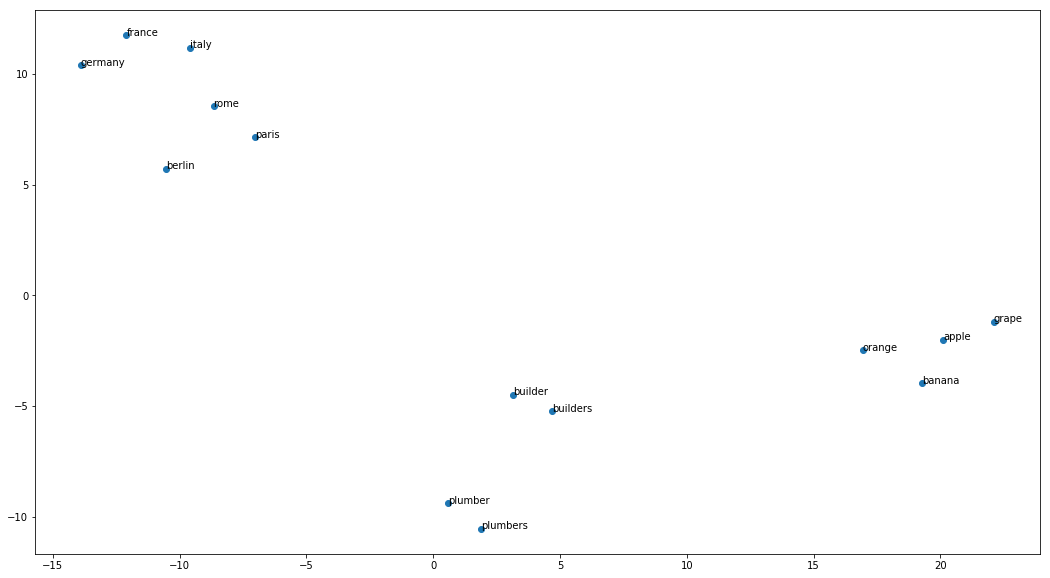

In [69]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

d= {}

d['orange']=model.vocab['orange']
d['apple']=model.vocab['apple']
d['banana']=model.vocab['banana']
d['grape']=model.vocab['grape']

d['france']=model.vocab['france']
d['germany']=model.vocab['germany']
d['italy']=model.vocab['italy']

d['paris']=model.vocab['paris']
d['berlin']=model.vocab['berlin']
d['rome']=model.vocab['rome']


d['builder']=model.vocab['builder']
d['builders']=model.vocab['builders']
d['plumber']=model.vocab['plumber']
d['plumbers']=model.vocab['plumbers']

vocab = list(d)

X = model[vocab]

tsne = TSNE(perplexity=3, n_components=2, learning_rate=1, init='random',random_state=3, n_iter=2000)

X_tsne = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))


Notice the existence of 3 to 5 pretty well determined clusters that the model has been able to abstract away from the corpus of data on which it was trained. Can you notice also the existence of syntactic and semantic regularities on the plot. 

You can try to plot your own  set of words and see what you think.